In [1]:
import numpy as np
import matplotlib.pyplot as plt

def psi(x, n):
    a = x.max() - x.min()
    return np.sqrt(2/a) * np.sin(n*np.pi*x/a)

def p_per_psi(x, n):
    a = x.max() - x.min()
    return 1/1j * n*np.pi/a * np.sqrt(2/a) * np.cos(n*x*np.pi/a)

def psquare_per_psi(x, n):
    a = x.max() - x.min()
    return (1/1j)**2 * (-1)*(n/a * np.pi)**2 * np.sqrt(2/a) * np.sin(n*x*np.pi/a)

In [2]:
x = np.linspace(0,1, 1000, dtype=np.float64)
plt.rc('figure', figsize=(12,8))

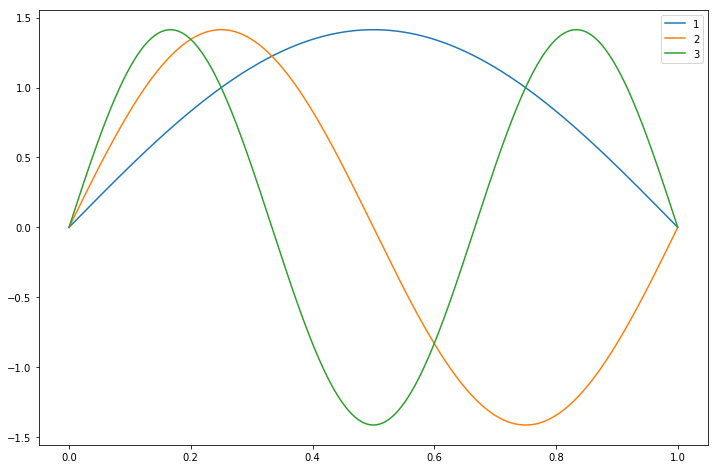

In [3]:
for n in range(1,4):
    plt.plot(x, psi(x, n), label=n)
    #plt.plot(x, -psi(x, n), label="-{}".format(n))
plt.legend()

(0, 1.1)

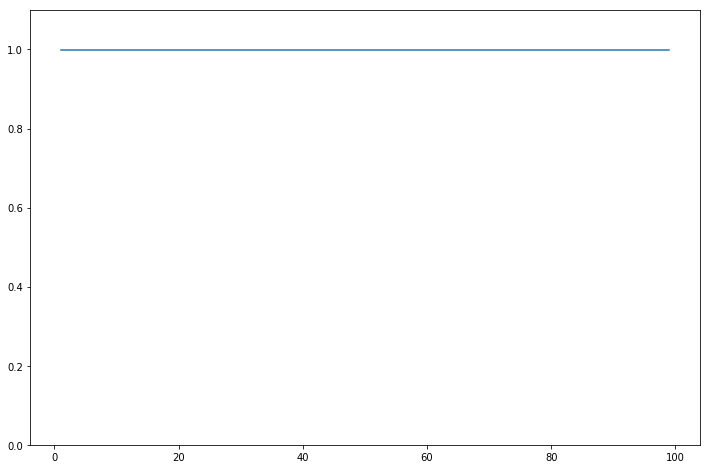

In [4]:
stati = range(1,100)
plt.plot(stati, [(psi(x, n)**2).mean() for n in stati])
plt.ylim(0,1.1)

In [5]:
len(stati)

99

In [6]:
np.array([(psi(x, n)**2).mean() for n in stati]).std()

2.5321897531902993e-16

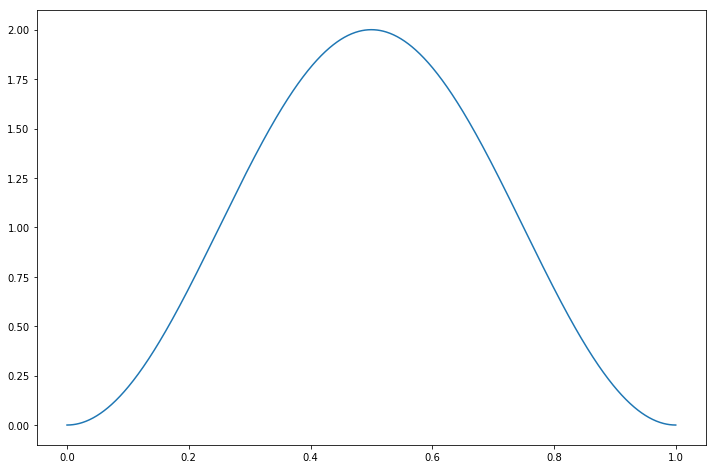

In [7]:
plt.plot(x, psi(x, 1)**2)

In [8]:
(psi(x, 1)**2).mean()

0.9990000000000002

In [9]:
def x_sigma(x, n):
    return (psi(x,n)*(x**2)*psi(x,n)).mean() - (psi(x,n)*(x)*psi(x,n)).mean()**2

def x_mu(x, n):
    return (psi(x, n) * x * psi(x, n)).mean()

(0, 0.9)

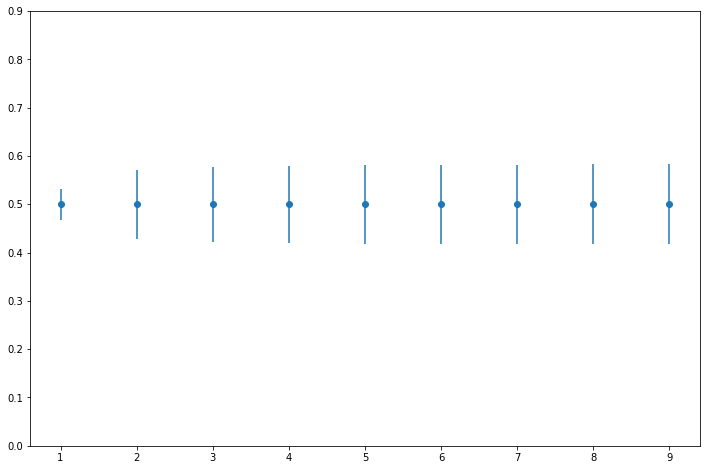

In [10]:
stati = range(1,10)
plt.errorbar(stati, [x_mu(x, n) for n in stati], yerr=[x_sigma(x, n) for n in stati], marker='o', linestyle='')
plt.ylim(0,.9)

/home/peppe/conda/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


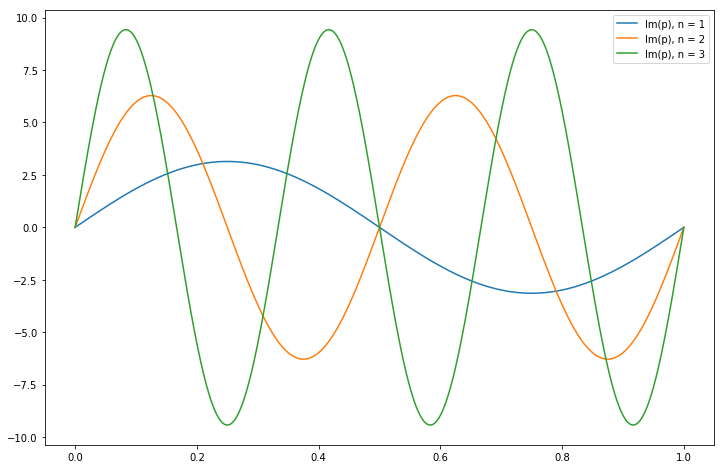

In [11]:
for n in range(1,4):
    plt.plot(x, 1j*(psi(x, n) * p_per_psi(x, n)), label = "Im(p), n = {}".format(n))
#plt.plot(x, psi(x, 1) * psquare_per_psi(x, 1), label= "p**2 medio")
plt.legend()

In [12]:
def p_mu(x, n): 
    return (psi(x, n) * p_per_psi(x, n)).mean()

def p_sigma(x, n):
    return ((psi(x, n)*psquare_per_psi(x, n)).mean()) - p_mu(x, n)**2

<ErrorbarContainer object of 3 artists>

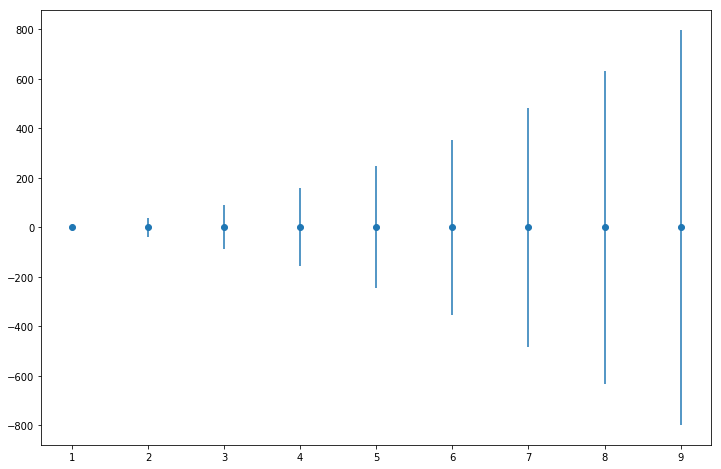

In [13]:
plt.errorbar(stati, [p_mu(x, n) for n in stati], yerr=[p_sigma(x, n) for n in stati], marker='o', linestyle='')

array([ 0.32428489+0.j,  2.79414106+0.j,  6.91056802+0.j, 12.67356575+0.j,
       20.08313426+0.j, 29.13927356+0.j, 39.84198363+0.j, 52.19126448+0.j,
       66.18711612+0.j])

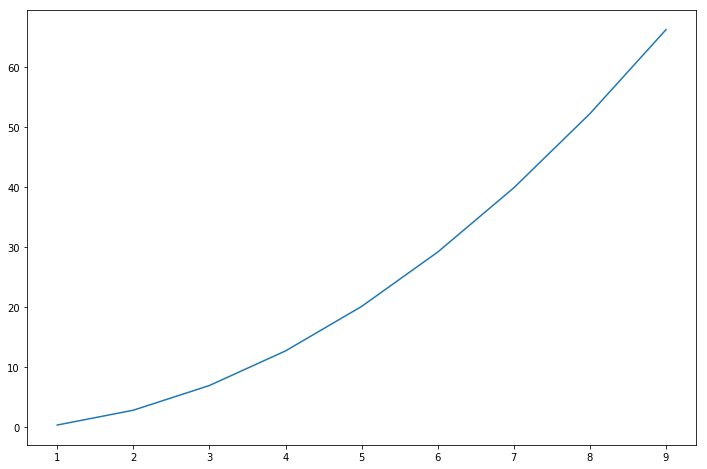

In [14]:
VOLUMI = np.array([p_sigma(x, n) for n in stati]) * np.array([x_sigma(x, n) for n in stati])
plt.plot(stati, np.abs(VOLUMI))
VOLUMI

(4.929867398344141+0j) 4.934802200544679
(-0.004934802200538435+0j)


/home/peppe/conda/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


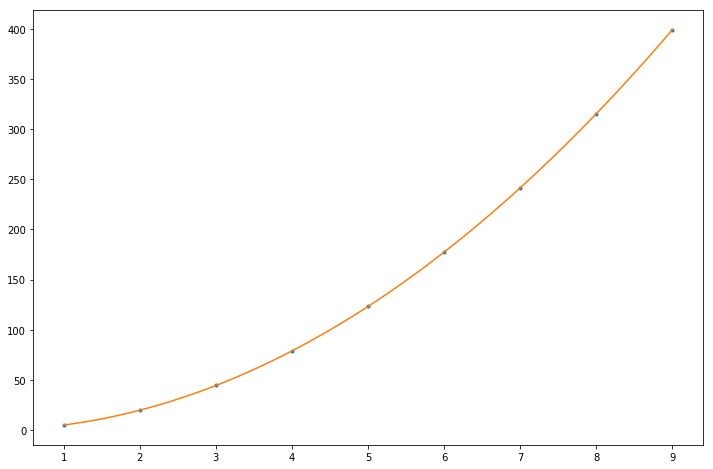

In [15]:
energie = np.array([(psi(x,n)*psquare_per_psi(x,n)/2).mean() for n in stati])
from scipy import stats

reg = stats.linregress(stati, energie)
poly = np.polyfit(stati, energie, 2)

plt.plot(stati, energie, '.') 
#plt.plot(stati, reg.intercept + stati*reg.slope, 'v-')
blabla = np.linspace(np.array(stati).min(), np.array(stati).max(), 100)
plt.plot(blabla, np.poly1d(poly)(blabla))
print(poly[0], np.pi**2 /2)
print(poly[0] - np.pi**2 /2)

In [16]:
energie[1:] - energie[:-1]

array([14.7896022 +0.j, 24.64933699+0.j, 34.50907179+0.j, 44.36880659+0.j,
       54.22854138+0.j, 64.08827618+0.j, 73.94801098+0.j, 83.80774577+0.j])

In [17]:
np.poly1d(poly)(9)

(399.3192592658748+0j)

In [18]:
poly

array([ 4.92986740e+00+0.j, -8.38090397e-14+0.j,  1.50934475e-13+0.j])